In [27]:
# Import dependencies
# Database Dependencies
import pymongo
import gridfs
import pandas as pd
import io
import numpy as np
from PIL import Image
import subprocess

# Machine Learning Dependencies
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
import matplotlib.pyplot as plt

# Neural Network Dependencies
import tensorflow as tf
from tensorflow import keras

# Database Connection and Loading Data

In [3]:
# Establish mongo instance and get Music database
client = pymongo.MongoClient('localhost')
db = client['Music_db']

In [4]:
# Select 'features_3_sec' collection, and read in as pandas DataFrame
collection = db['feat_3'].find()
features_3_df = pd.DataFrame(list(collection))

# Drop mongo generated hash-code id column
features_3_df = features_3_df.drop(columns = ["_id"])
features_3_df

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


In [5]:
cwd_bytes = subprocess.check_output("pwd")
cwd = cwd_bytes.decode("utf-8").rstrip("\n") + "/"

In [6]:
# identify path for images
images_path = "Data/images_original/"

In [7]:
byte_images = subprocess.check_output(["ls", cwd + images_path])
images_folder = byte_images.decode("utf-8").split("\n")
images_folder.pop(-1)

''

In [8]:
# Establish the gridfs instance
fs = gridfs.GridFS(db)

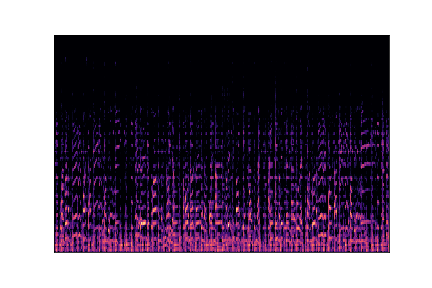

In [33]:
test_raw = fs.get_last_version("Data/images_original/blues/blues00000.png")
test_bytes = test_raw.read()
rgba_test = Image.open(io.BytesIO(test_bytes))
rgba_test

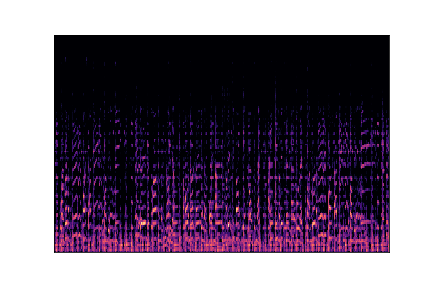

In [34]:
rgb_test = rgba_test.convert("RGB")
rgb_test

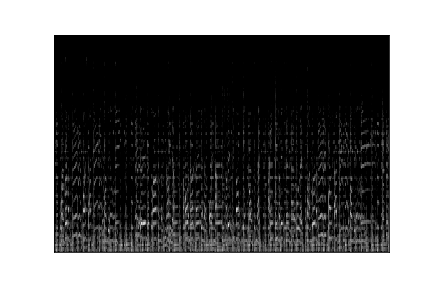

In [39]:
from PIL import ImageOps
gray_test = ImageOps.grayscale(rgb_test)
gray_test

In [40]:
np.asarray(gray_test)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [51]:
images = []
genres = []

for folder in images_folder:
    byte_files = subprocess.check_output(["ls", cwd + images_path + folder])
    files = byte_files.decode("utf-8").split("\n")
    files.pop(-1)
    
    for file in files:
        file_path = images_path + folder + "/" + file
        image_raw = fs.get_last_version(file_path)
        image_bytes = image_raw.read()
        rgba_image = Image.open(io.BytesIO(image_bytes))
        rgb_image = rgba_image.convert("RGB")
        gray_image = ImageOps.grayscale(rgb_image)
        image_data = np.asarray(gray_image)
        images.append(image_data)
        genres.append(folder)

In [52]:
images = np.asarray(images)
genres = np.asarray(genres)

In [53]:
print(images.shape)
print(genres.shape)

(999, 288, 432)
(999,)


In [54]:
# Print non-black rows of first image
for row in images[0]:
    if not np.all(row == 255):
        print(row)

[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

In [55]:
images[0].shape

(288, 432)

# Build, Train, and Test Models to Predict `label` from feature data

## `DecisionTreeClassifier`

In [ ]:
# Separate Features (X) from the Target (y)
y = features_3_df["label"]
X = features_3_df.drop(columns="label", axis=1)

In [ ]:
# Drop `filename` (identifier/same as `label`) and `length` (same for all songs - 3 sec sample)
# from features X
X = X.drop(columns=["filename", "length"], axis=1)
X

In [ ]:
# Encode class labels in target y
genre_nums = {}
cnt = 1
for genre in y.unique():
    genre_nums[genre] = cnt
    cnt += 1

y = y.apply(lambda x: genre_nums[x])
genre_nums

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# Instantitae DecisionTreeClassifier
tree_model = DecisionTreeClassifier()

# Fit the model
tree_model = tree_model.fit(X_train, y_train)

# Make predictions using the testing data
tree_pred = tree_model.predict(X_test)
results = pd.DataFrame({
    "Prediction": tree_pred,
    "Actual": y_test
}).reset_index(drop=True)
results

In [ ]:
# Evaluate model
cm = sklearn.metrics.confusion_matrix(y_test, tree_pred)
cm

In [ ]:
# Calculate Accuracy Score
acc_score = sklearn.metrics.accuracy_score(y_test, tree_pred)
acc_score

In [ ]:
# Print classification report
print(sklearn.metrics.classification_report(y_test, tree_pred))

## `KNN`

In [ ]:
# Instantiate SVM
knn_model = KNeighborsClassifier(n_neighbors=21)

# Fit the model
knn_model = knn_model.fit(X_train, y_train)

# Make predicitions using the testing data
knn_pred = knn_model.predict(X_test)
results = pd.DataFrame({
    "Prediction": knn_pred,
    "Actual": y_test
}).reset_index(drop=True)
results

In [ ]:
# Evaluate model
cm = sklearn.metrics.confusion_matrix(y_test, knn_pred)
cm

In [ ]:
# Calculate Accuracy Score
acc_score = sklearn.metrics.accuracy_score(y_test, knn_pred)
acc_score

In [ ]:
# Print classification report
print(sklearn.metrics.classification_report(y_test, knn_pred))

## Naive-Bayes Classifier

In [ ]:
# Instantiate the model
gnb_model = GaussianNB()

# Fit the model
gnb_model = gnb_model.fit(X_train, y_train)

# Make predicitions using the testing data
gnb_pred = gnb_model.predict(X_test)
results = pd.DataFrame({
    "Prediction": gnb_pred,
    "Actual": y_test
}).reset_index(drop=True)
results

In [ ]:
# Evaluate model
cm = sklearn.metrics.confusion_matrix(y_test, gnb_pred)
cm

In [ ]:
# Calculate Accuracy Score
acc_score = sklearn.metrics.accuracy_score(y_test, gnb_pred)
acc_score

In [ ]:
# Print classification report
print(sklearn.metrics.classification_report(y_test, gnb_pred))

## `RandomForestClassifier`

In [ ]:
# Instantiate the model
rf_model = RandomForestClassifier(n_estimators=500)

# Fit the model
rf_model = rf_model.fit(X_train, y_train)

# Make predicitions using the testing data
rf_pred = rf_model.predict(X_test)
results = pd.DataFrame({
    "Prediction": rf_pred,
    "Actual": y_test
}).reset_index(drop=True)
results

In [ ]:
# Evaluate model
cm = sklearn.metrics.confusion_matrix(y_test, rf_pred)
cm

In [ ]:
plt.imshow(cm, cmap='hot', interpolation='nearest')
plt.show()

In [ ]:
# Calculate Accuracy Score
acc_score = sklearn.metrics.accuracy_score(y_test, rf_pred)
acc_score

In [ ]:
# Print classification report
print(sklearn.metrics.classification_report(y_test, rf_pred))